# Deep Fish Classifier
A simple image classifier using FastAI and DuckDuckGo search.

In [1]:
!pip install -U duckduckgo-search fastai python-slugify

   ---------------------------------------- 0.0/4.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.5/4.0 MB 2.4 MB/s eta 0:00:02
   ---------- ----------------------------- 1.0/4.0 MB 2.7 MB/s eta 0:00:02
   --------------- ------------------------ 1.6/4.0 MB 2.8 MB/s eta 0:00:01
   ----------------------- ---------------- 2.4/4.0 MB 2.9 MB/s eta 0:00:01
   ---------------------------- ----------- 2.9/4.0 MB 2.9 MB/s eta 0:00:01
   ------------------------------------ --- 3.7/4.0 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 4.0/4.0 MB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
   ------ --------------------------------- 0.5/3.1 MB 2.4 MB/s eta 0:00:02
   ------------- -------------------------- 1.0/3.1 MB 3.0 MB/s eta 0:00:01
   ----------------------- ---------------- 1.8/3.1 MB 2.9 MB/s eta 0:00:01
   ----------------------------- ---------- 2.4/3.1 MB 2.9 MB/s eta 0:00:01
   -----------------------

In [2]:
from duckduckgo_search import DDGS
from fastai.vision.all import *
from pathlib import Path
from slugify import slugify

In [3]:
def search_images_ddg(key, max_images=50):
    """Search for image URLs using DuckDuckGo."""
    try:
        with DDGS() as ddgs:
            return [r["image"] for r in ddgs.images(key, max_results=max_images) if r.get("image")]
    except Exception as e:
        print(f"Search failed for {key}: {e}")
        return []

In [ ]:
categories = ['deep sea anglerfish',
    'gulper eel',
    'fangtooth fish',
    'viperfish',
    'black dragonfish']
path = Path('deep_fish')
path.mkdir(exist_ok=True)

for category in categories:
    print(f"Searching and downloading: {category}")
    dest = path/slugify(category)
    dest.mkdir(exist_ok=True, parents=True)
    results = search_images_ddg(category, max_images=50)
    download_images(dest, urls=results)
    verify_images(get_image_files(dest))

Searching and downloading: deep sea anglerfish


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Searching and downloading: gulper eel


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Searching and downloading: deep sea anglerfish


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Searching and downloading: gulper eel


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Searching and downloading: fangtooth fish


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Searching and downloading: viperfish


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Searching and downloading: black dragonfish


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


In [23]:
# Clean corrupted images
failed = verify_images(get_image_files(path))
print(f"Found {len(failed)} corrupted images.")
failed.map(Path.unlink)


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:3570: UserWarning: image file could not be identified because AVIF support not installed
  warnings.warn(message)


Found 27 corrupted images.


(#27) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [ ]:
# Optional: delete all images in each subfolder of deep_fish
def empty_folders(path):
    for folder in path.ls():
        if folder.is_dir():
            for img_file in folder.ls():
                img_file.unlink()
            print(f"Emptied folder: {folder.name}")

# Uncomment the line below to actually run the cleanup
# empty_folders(path)


Emptied folder: fangtooth-fish
Emptied folder: viperfish
Emptied folder: black-dragonfish
Emptied folder: gulper-eel
Emptied folder: deep-sea-anglerfish


In [11]:
import matplotlib.pyplot as plt

fangtooth-fish: 47 images
viperfish: 44 images
black-dragonfish: 40 images
gulper-eel: 46 images
deep-sea-anglerfish: 46 images


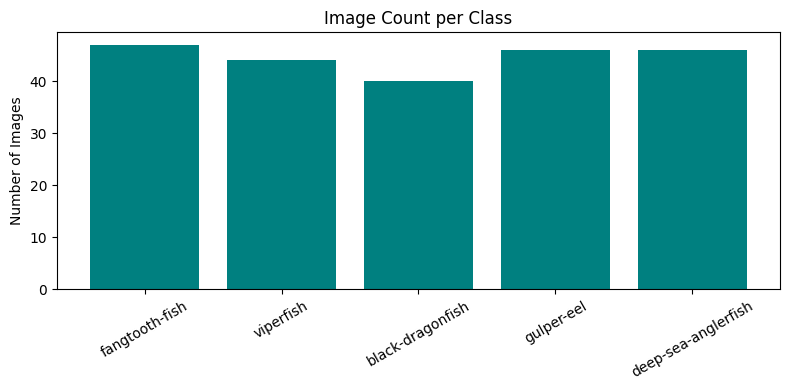

In [28]:

# Count images in each subfolder (i.e., class)
class_counts = {folder.name: len(get_image_files(folder)) for folder in path.ls() if folder.is_dir()}

# Print counts
for cls, count in class_counts.items():
    print(f"{cls}: {count} images")

# Plot
plt.figure(figsize=(8, 4))
plt.bar(class_counts.keys(), class_counts.values(), color='teal')
plt.title('Image Count per Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


In [25]:
files = get_image_files(path/'gulper-eel')
for f in files[46:]:
    f.unlink()



In [27]:
files = get_image_files(path/'deep-sea-anglerfish')
for f in files[46:]:
    f.unlink()


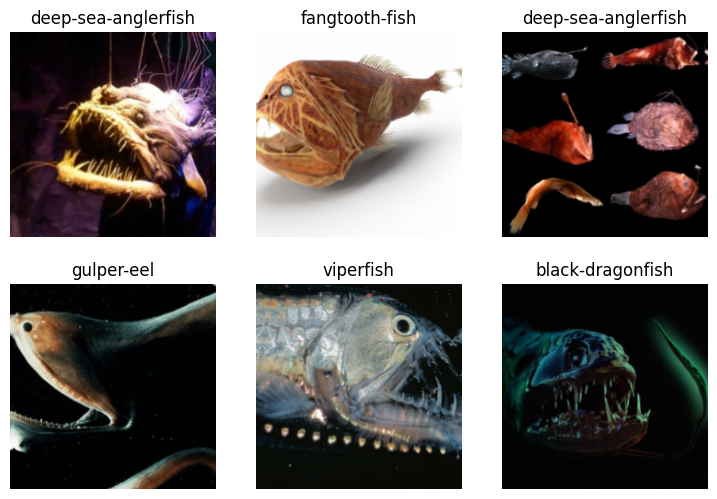

In [33]:
dls = ImageDataLoaders.from_folder(
    path,
    train=".",
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)
dls.show_batch(max_n=6)

In [35]:
# Train a simple ResNet50 model
learn = vision_learner(dls, resnet50, metrics=accuracy)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,time
0,2.795835,1.780549,0.431818,00:07


epoch,train_loss,valid_loss,accuracy,time
0,1.512609,1.246472,0.477273,00:06
1,1.387319,0.828573,0.750000,00:07
2,1.104202,0.614043,0.863636,00:06
3,0.947844,0.549015,0.886364,00:07
4,0.833176,0.490390,0.886364,00:06
5,0.741021,0.458805,0.909091,00:07


##Using the image uploader and running predictions

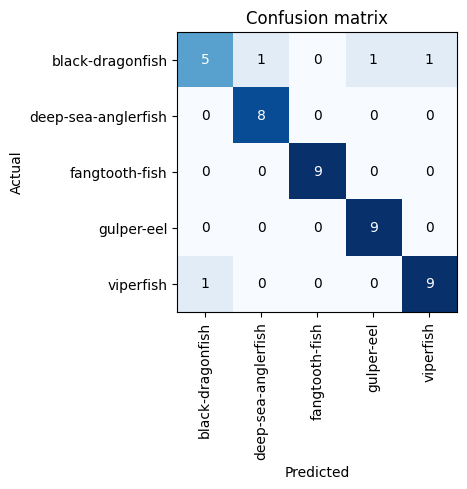

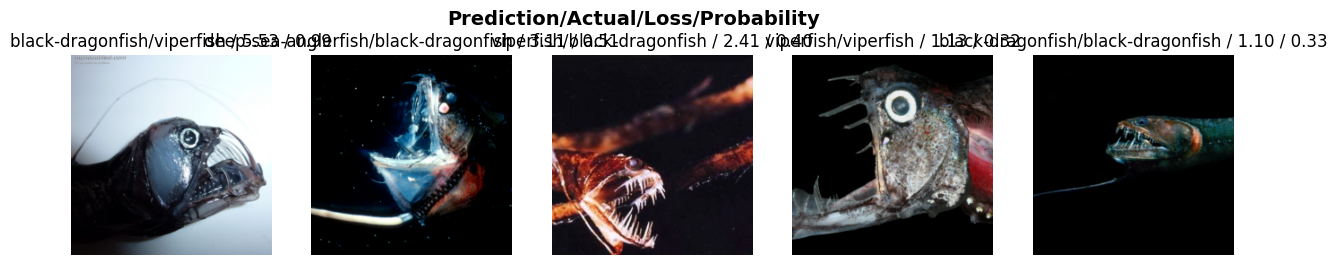

In [36]:
# Interpretting the results:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)


In [38]:
img = PILImage.create('test-deep-sea-fish.png')
pred_class, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred_class} ({probs[pred_idx]:.2%})")


Prediction: viperfish (92.66%)


In [39]:
img = PILImage.create('test-deep-sea-fish-2.png')
pred_class, pred_idx, probs = learn.predict(img)
print(f"Prediction: {pred_class} ({probs[pred_idx]:.2%})")


Prediction: deep-sea-anglerfish (95.53%)


In [40]:
# Save the model
learn.export('deep_fish_classifier.pkl')